In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
import pingouin as pg
import reliability_stability
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\raft_data_3-nodes_1-fail.csv", error_bad_lines=False, sep=",")
paxos = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\paxos_data_3-nodes_1-fail.csv", error_bad_lines=False, sep=",")
noAlg = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\control\\outdoor_control_3-nodes_1-fail\\data.csv", error_bad_lines=False, sep=",")

In [4]:
raft.shape

(2466, 8)

In [5]:
paxos.shape

(2476, 8)

In [6]:
noAlg.shape

(1558, 8)

In [7]:
raft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2466 non-null   object 
 1   packetNumber  2466 non-null   object 
 2   temperature   2466 non-null   int64  
 3   brightness    2420 non-null   object 
 4   humidity      2420 non-null   object 
 5   onBoardTemp   2419 non-null   object 
 6   sent          2419 non-null   object 
 7   received      2417 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 154.2+ KB


In [8]:
paxos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2476 non-null   object 
 1   packetNumber  2476 non-null   object 
 2   temperature   2476 non-null   int64  
 3   brightness    2463 non-null   object 
 4   humidity      2463 non-null   object 
 5   onBoardTemp   2463 non-null   object 
 6   sent          2463 non-null   object 
 7   received      2458 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 154.9+ KB


In [9]:
noAlg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      1558 non-null   object 
 1   packetNumber  1557 non-null   object 
 2   temperature   1548 non-null   object 
 3   brightness    1539 non-null   object 
 4   humidity      1536 non-null   object 
 5   onBoardTemp   1529 non-null   object 
 6   sent          1513 non-null   object 
 7   received      1489 non-null   float64
dtypes: float64(1), object(7)
memory usage: 97.5+ KB


In [10]:
raft[raft.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,2,1,20,114,46,20,706541300267,7.065413e+11
1,1,5,21,182,48,20,706541309116,7.065413e+11
2,2,2,20,108,46,20,706541310785,7.065413e+11
3,NaN,706541312156,706541312832,NaN,NaN,NaN,NaN,NaN
4,NaN,706541319637,706541319874,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2461,2,996,21,474,35,24,706551765867,7.065518e+11
2462,2,997,21,498,35,24,706551767375,7.065518e+11
2463,2,998,22,501,35,24,706551768883,7.065518e+11
2464,2,999,22,478,35,24,706551770391,7.065518e+11


In [11]:
paxos[paxos.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,1,2,21,176,48,22,706558002534,7.065580e+11
1,NaN,706558004047,706558004979,NaN,NaN,NaN,NaN,NaN
2,NaN,706558005558,706558006470,NaN,NaN,NaN,NaN,NaN
3,2,1,21,104,49,22,706558007208,7.065580e+11
4,3,1,21,131,54,22,706558009751,7.065580e+11
...,...,...,...,...,...,...,...,...
2471,2,996,23,0,40,23,706568496020,7.065685e+11
2472,2,997,23,0,40,23,706568497527,7.065685e+11
2473,2,998,22,0,40,23,706568499035,7.065685e+11
2474,2,999,23,0,40,23,706568500543,7.065685e+11


In [12]:
noAlg[noAlg.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,3,3,20,251,48,22,706627140296,7.066271e+11
1,2,1,21,576,42,22,706627140391,7.066271e+11
2,NaN,706627141602,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,21,575,42,22,706627141698,7.066271e+11
4,NaN,706627143115,706627142886,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1553,3,996,22,436,41,24,706628643863,7.066286e+11
1554,3,997,21,572,41,24,706628645671,7.066286e+11
1555,3,998,21,571,41,24,706628647078,7.066286e+11
1556,3,999,21,440,41,24,706628648186,7.066286e+11


In [13]:
raft_dropna=raft.dropna()

In [14]:
raft_dropna.shape

(2416, 8)

In [15]:
paxos_dropna=paxos.dropna()

In [16]:
paxos_dropna.shape

(2458, 8)

In [17]:
noAlg_dropna=noAlg.dropna()

In [18]:
noAlg_dropna.shape

(1489, 8)

In [19]:
raft_timings = raft_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [20]:
paxos_timings = paxos_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [21]:
noAlg_timings = noAlg_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [22]:
raft_timings_coerce = raft_timings.apply(pd.to_numeric, errors = 'coerce')

In [23]:
paxos_timings_coerce= paxos_timings.apply(pd.to_numeric, errors = 'coerce')

In [24]:
noAlg_timings_coerce= noAlg_timings.apply(pd.to_numeric, errors = 'coerce')

In [25]:
raft_timings_coerce_dropna=raft_timings_coerce.dropna()

In [26]:
paxos_timings_coerce_dropna=paxos_timings_coerce.dropna()

In [27]:
noAlg_timings_coerce_dropna=noAlg_timings_coerce.dropna()

In [28]:
raft_timings_coerce_dropna.shape

(2416, 2)

In [29]:
paxos_timings_coerce_dropna.shape

(2456, 2)

In [30]:
noAlg_timings_coerce_dropna.shape

(1442, 2)

In [31]:
raft_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 0 to 2465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2416 non-null   int64  
 1   received  2416 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 56.6 KB


In [32]:
paxos_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2475
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2456 non-null   float64
 1   received  2456 non-null   float64
dtypes: float64(2)
memory usage: 57.6 KB


In [33]:
noAlg_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1557
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      1442 non-null   float64
 1   received  1442 non-null   float64
dtypes: float64(2)
memory usage: 33.8 KB


In [34]:
raft_timings_redone = {'sent': [],'received':[]}

raft_result_redone = pd.DataFrame(raft_timings_redone)

In [35]:
paxos_timings_redone = {'sent': [],'received':[]}

paxos_result_redone = pd.DataFrame(paxos_timings_redone)

In [36]:
noAlg_timings_redone = {'sent': [],'received':[]}

noAlg_result_redone = pd.DataFrame(noAlg_timings_redone)

In [37]:
for index, row in raft_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > raft_timings_coerce_dropna['sent'].iloc[0]):
            
            raft_result_redone.at[index, 'sent'] = int(row['sent'])
            raft_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [38]:
for index, row in paxos_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > paxos_timings_coerce_dropna['sent'].iloc[0]):
            
            paxos_result_redone.at[index, 'sent'] = int(row['sent'])
            paxos_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [39]:
for index, row in noAlg_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > noAlg_timings_coerce_dropna['sent'].iloc[0]):
            
            noAlg_result_redone.at[index, 'sent'] = int(row['sent'])
            noAlg_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [40]:
raft_result_redone.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709 entries, 1 to 2465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      1709 non-null   float64
 1   received  1709 non-null   float64
dtypes: float64(2)
memory usage: 120.1 KB


In [41]:
paxos_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 4 to 2463
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      1191 non-null   float64
 1   received  1191 non-null   float64
dtypes: float64(2)
memory usage: 67.9 KB


In [42]:
noAlg_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 1 to 1548
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      877 non-null    float64
 1   received  877 non-null    float64
dtypes: float64(2)
memory usage: 60.6 KB


In [43]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=raft_result_redone)

(0.9999999990471669, array([1., 1.]))

In [44]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=paxos_result_redone)

(0.9999999985774688, array([1., 1.]))

In [45]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=noAlg_result_redone)

(0.9999999830284905, array([1., 1.]))

In [46]:
raft_latency_pd = {'latency': []}

raft_latency = pd.DataFrame(raft_latency_pd)

In [47]:
paxos_latency_pd = {'latency': []}

paxos_latency = pd.DataFrame(paxos_latency_pd)

In [48]:
noAlg_latency_pd = {'latency': []}

noAlg_latency = pd.DataFrame(noAlg_latency_pd)

In [49]:
for index, row in raft_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        raft_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [50]:
for index, row in paxos_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        paxos_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [51]:
for index, row in noAlg_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        noAlg_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [52]:
raft_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709 entries, 1 to 2465
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  1709 non-null   float64
dtypes: float64(1)
memory usage: 106.7 KB


In [53]:
raft_latency.shape

(1709, 1)

In [54]:
paxos_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 4 to 2463
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  1191 non-null   float64
dtypes: float64(1)
memory usage: 58.6 KB


In [55]:
paxos_latency.shape

(1191, 1)

In [56]:
noAlg_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 1 to 1548
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  877 non-null    float64
dtypes: float64(1)
memory usage: 53.7 KB


In [57]:
noAlg_latency.shape

(877, 1)

In [58]:
raft_latency['latency'].mean()

221.8279695728496

In [59]:
paxos_latency['latency'].mean()

511.79932829554997

In [60]:
noAlg_latency['latency'].mean()

364.19726339794755

In [61]:
pwd

'C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook'

In [68]:
latency_3_1 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_3_1.csv", error_bad_lines=False, sep=",")

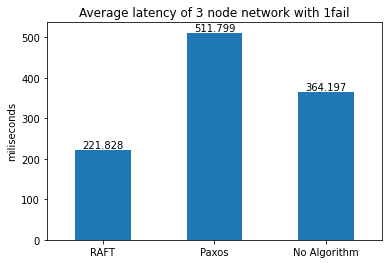

In [69]:
ax = latency_3_1.plot.bar(x='algorithm')
plt.title('Average latency of 3 node network with 1fail')
ax.set(xlabel='', ylabel='miliseconds')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
#plt.legend(loc='upper right')
ax.get_legend().remove()
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\latency_3_1_mean.png', bbox_inches='tight')
